In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
miss_val=["NaN","n/a","na","N/A","NA","Na","nan"]

In [3]:
df=pd.read_csv(r"C:\Users\SMART\Downloads\train_LZdllcl.csv",na_values=miss_val)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.shape

(54808, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [8]:
df['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [9]:
df['education']=df['education'].fillna("Bachelor's")

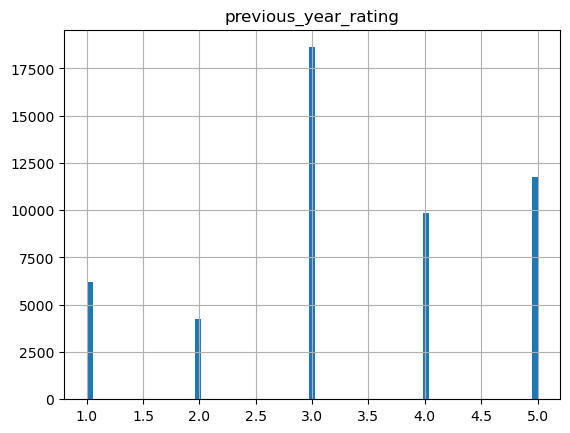

In [10]:
df.hist('previous_year_rating',bins=75);

In [11]:
df['previous_year_rating'].median()

3.0

In [12]:
df['previous_year_rating']=df['previous_year_rating'].fillna(3.0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [14]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
df1=df.copy()
df1['department']=le.fit_transform(df1['department'])
df1['region']=le.fit_transform(df1['region'])
df1['education']=le.fit_transform(df1['education'])
df1['gender']=le.fit_transform(df1['gender'])
df1['recruitment_channel']=le.fit_transform(df1['recruitment_channel'])

In [17]:
df1.corr()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005187,-0.003423,0.002124,-0.001542,0.005960,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
department,-0.005187,1.000000,-0.020592,0.043441,-0.030108,0.004732,0.014152,0.079162,-0.135561,0.059060,-0.088209,-0.002151,-0.251626,0.000130
region,-0.003423,-0.020592,1.000000,-0.003815,0.019730,-0.000920,-0.004590,-0.088918,-0.005977,-0.058939,-0.007664,0.000307,0.023572,0.008841
education,0.002124,0.043441,-0.003815,1.000000,-0.032368,-0.003564,-0.033469,0.339966,0.027393,0.233666,0.012123,-0.001409,0.032787,0.029257
gender,-0.001542,-0.030108,0.019730,-0.032368,1.000000,0.006567,0.084501,-0.016293,-0.024024,-0.019675,-0.037400,0.002381,-0.024494,-0.011109
recruitment_channel,0.005960,0.004732,-0.000920,-0.003564,0.006567,1.000000,-0.010405,-0.011400,0.005731,-0.002887,-0.000297,-0.005510,-0.002416,0.002229
no_of_trainings,-0.005121,0.014152,-0.004590,-0.033469,0.084501,-0.010405,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,0.079162,-0.088918,0.339966,-0.016293,-0.011400,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.135561,-0.005977,0.027393,-0.024024,0.005731,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,0.059060,-0.058939,0.233666,-0.019675,-0.002887,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670


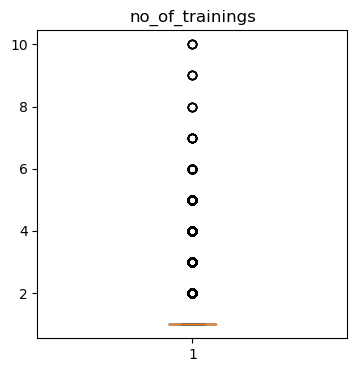

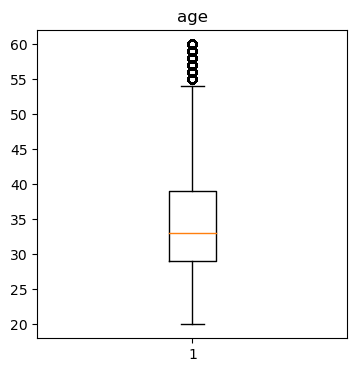

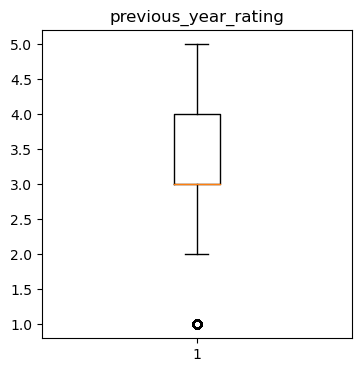

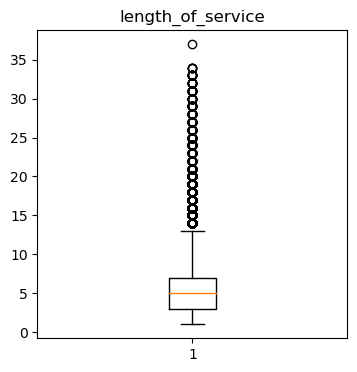

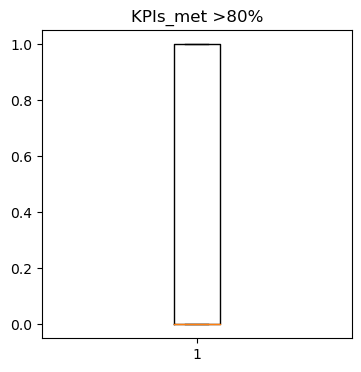

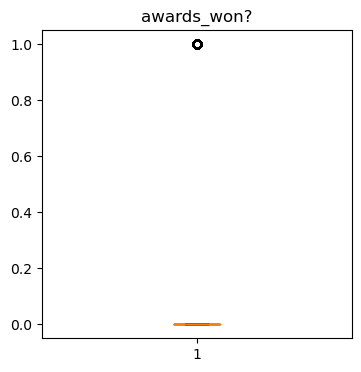

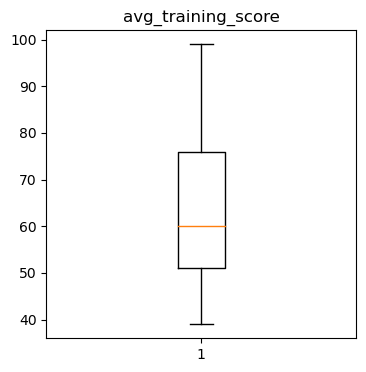

In [18]:
for col in ["no_of_trainings",'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%','awards_won?','avg_training_score']:
    plt.figure(figsize=(4,4))
    plt.boxplot(df1[col])
    plt.title(col)
    plt.show()

In [19]:
def limits(data,col):
    Q1=data[col].quantile(.25)
    Q3=data[col].quantile(.75)
    IQR=Q3-Q1
    low_bound=Q1-IQR*1.5
    up_bound=Q3+IQR*1.5
    return low_bound,up_bound

In [20]:
low_length_of_service,up_length_of_service=limits(df1,"length_of_service")

In [21]:
df[df1['length_of_service']>up_length_of_service]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
13,38401,Technology,region_29,Master's & above,m,other,2,39,3.0,16,0,0,80,0
42,23560,HR,region_2,Bachelor's,m,sourcing,1,59,4.0,26,1,0,52,0
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
74,77577,Sales & Marketing,region_7,Bachelor's,m,other,1,50,3.0,14,0,0,52,0
99,51256,Finance,region_2,Master's & above,m,other,1,60,5.0,17,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54691,4210,Analytics,region_2,Master's & above,m,sourcing,1,47,5.0,19,0,0,86,0
54695,41348,Operations,region_2,Bachelor's,f,other,2,52,5.0,18,1,0,56,1
54697,10636,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,47,5.0,15,0,0,50,0
54754,45697,Technology,region_26,Bachelor's,f,other,1,42,3.0,14,0,0,79,0


In [22]:
df[df1['age']-df1['length_of_service']<18]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
35422,49597,Operations,region_9,Master's & above,m,other,1,30,4.0,13,1,0,63,0


In [23]:
df['length_of_service'].iloc[35422]=12

In [24]:
low_previous_year_rating,up_previous_year_rating=limits(df1,"previous_year_rating")

In [25]:
df[df['previous_year_rating']<low_previous_year_rating]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
15,43931,Operations,region_7,Bachelor's,m,other,1,37,1.0,10,0,0,60,0
17,9403,Sales & Marketing,region_31,Bachelor's,m,other,1,34,1.0,4,0,0,51,0
31,58536,Finance,region_31,Bachelor's,m,other,2,26,1.0,2,0,0,61,0
32,35465,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,24,1.0,2,0,0,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54791,27274,Technology,region_11,Bachelor's,m,sourcing,1,32,1.0,3,1,0,82,0
54793,28400,Technology,region_2,Bachelor's,m,other,1,33,1.0,9,0,0,79,0
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [26]:
for col in ['recruitment_channel','department','region','education']:
    print(col,"unique values:",df[col].unique())

recruitment_channel unique values: ['sourcing' 'other' 'referred']
department unique values: ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region unique values: ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education unique values: ["Master's & above" "Bachelor's" 'Below Secondary']


In [27]:
df2=df.copy()

In [28]:
df2['region']=le.fit_transform(df2['region'])

In [29]:
df2=pd.get_dummies(df2)

In [30]:
df2.head(3)

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,31,1,35,5.0,8,1,0,49,0,...,1,0,0,0,1,1,0,0,0,1
1,65141,14,1,30,5.0,4,0,0,60,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,10,1,34,3.0,7,0,0,50,0,...,1,0,1,0,0,0,1,0,0,1


In [31]:
df2.employee_id.nunique()

54808

In [32]:
df2['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [33]:
X=df2.drop(['employee_id','is_promoted'],axis=1)
y=df2['is_promoted']

In [34]:
X.head(3)

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,31,1,35,5.0,8,1,0,49,0,0,...,1,0,0,0,1,1,0,0,0,1
1,14,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,10,1,34,3.0,7,0,0,50,0,0,...,1,0,1,0,0,0,1,0,0,1


In [35]:
y.head(3)

0    0
1    0
2    0
Name: is_promoted, dtype: int64

In [81]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score,KFold

In [37]:
lg=LogisticRegression()
svc=SVC()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
val_metric=f1_score
kf=KFold(n_splits=5)

In [38]:
score_lg=cross_val_score(lg,X,y,scoring='accuracy',cv=kf)
score_lg

array([0.91671228, 0.9258347 , 0.91862799, 0.91743454, 0.92254356])

In [39]:
score_lg.mean()

0.9202306144518188

In [40]:
from sklearn import tree
max_dept=range(1,11)

for val in max_dept:
    score=cross_val_score(tree.DecisionTreeClassifier(max_depth=val),X,y,cv=kf,scoring='accuracy')
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.923
Average score(2): 0.923
Average score(3): 0.923
Average score(4): 0.926
Average score(5): 0.926
Average score(6): 0.930
Average score(7): 0.934
Average score(8): 0.934
Average score(9): 0.936
Average score(10): 0.938


In [41]:
score_rf=cross_val_score(rf,X,y,scoring='accuracy',cv=kf)
score_rf

array([0.9352308 , 0.93897099, 0.93623426, 0.93704954, 0.93504242])

In [42]:
score_rf.mean()

0.9365056028455101

In [43]:
#score_svc=cross_val_score(svc,X,y,scoring='accuracy',cv=5)
#score_svc.mean()

In [44]:
score_gb=cross_val_score(gb,X,y,scoring='accuracy',cv=5)
score_gb.mean()

0.9396985823633279

In [45]:
score_ada=cross_val_score(ada,X,y,scoring='accuracy',cv=5)
score_ada.mean()

0.9249014980564769

### Test Data 

In [48]:
data=pd.read_csv(r"C:\Users\SMART\Downloads\test_2umaH9m.csv")

In [49]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [50]:
sample=pd.read_csv(r"C:\Users\SMART\Downloads\sample_submission_M0L0uXE.csv")

In [51]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [98]:
sample.is_promoted.value_counts()

0    23490
Name: is_promoted, dtype: int64

In [52]:
data.shape

(23490, 13)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [54]:
data['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [55]:
data['education']=data['education'].fillna("Bachelor's")

In [56]:
data['previous_year_rating'].median()

3.0

In [57]:
data['previous_year_rating']=data['previous_year_rating'].fillna(3.0)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [59]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.312984,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.216959,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


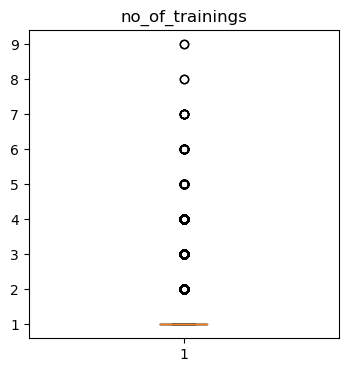

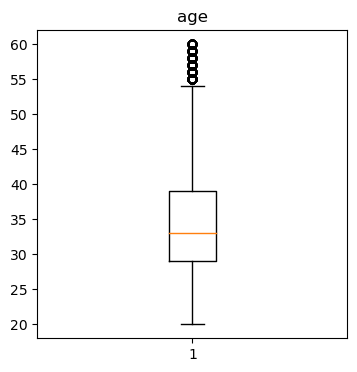

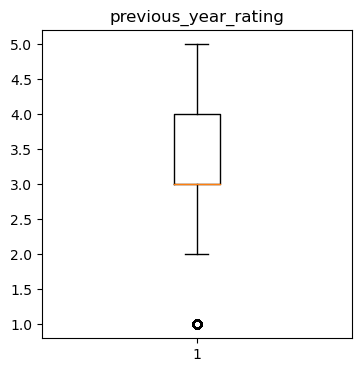

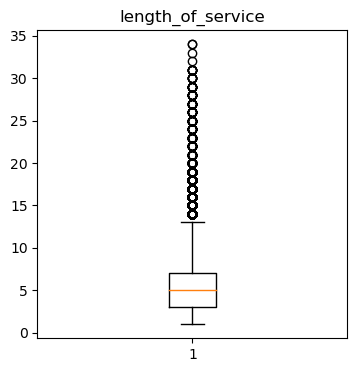

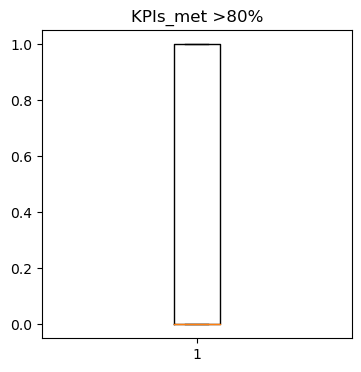

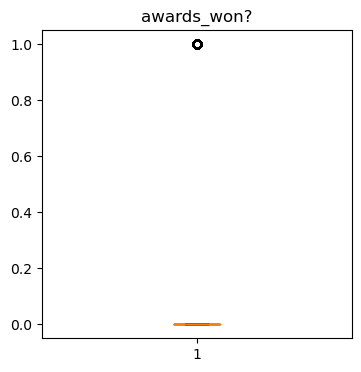

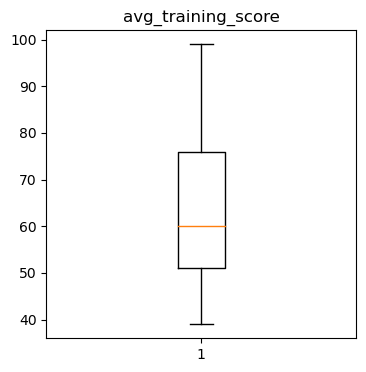

In [60]:
for col in ["no_of_trainings",'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%','awards_won?','avg_training_score']:
    plt.figure(figsize=(4,4))
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()

In [61]:
data[data['age']-data['length_of_service']<18]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score


In [62]:
df3=data.copy()

In [63]:
df3['region']=le.fit_transform(df3['region'])

In [64]:
df3=pd.get_dummies(df3)

In [65]:
df3.head(3)

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,18,1,24,3.0,1,1,0,77,0,...,0,1,1,0,0,0,1,0,0,1
1,74430,28,1,31,3.0,5,0,0,51,0,...,0,0,1,0,0,1,0,1,0,0
2,72255,4,1,31,1.0,4,0,0,47,0,...,1,0,1,0,0,0,1,1,0,0


In [68]:
X_test=df3.drop(['employee_id'],axis=1)
y_test=sample.drop(['employee_id'],axis=1)

In [69]:
X_test.head(3)

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,18,1,24,3.0,1,1,0,77,0,0,...,0,1,1,0,0,0,1,0,0,1
1,28,1,31,3.0,5,0,0,51,0,0,...,0,0,1,0,0,1,0,1,0,0
2,4,1,31,1.0,4,0,0,47,0,0,...,1,0,1,0,0,0,1,1,0,0


In [70]:
gb.fit(X,y)

GradientBoostingClassifier()

In [71]:
y_pred_gb=gb.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred_gb)

0.9752660706683696

In [74]:
f1_score(y_test,y_pred_gb)

0.0

In [75]:
rf.fit(X,y)

RandomForestClassifier()

In [77]:
y_pred_rf=rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9682843763303534

In [78]:
f1_score(y_test,y_pred_gb)

0.0

In [79]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

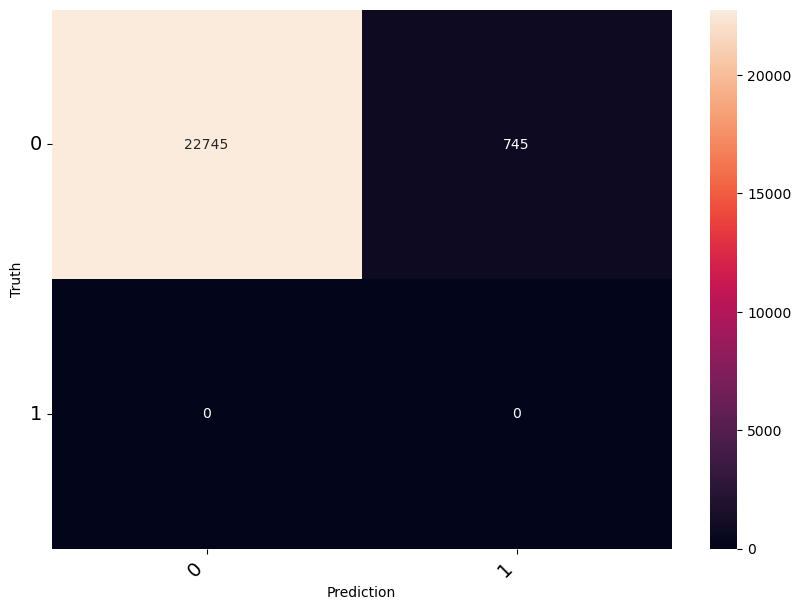

In [82]:
cm = confusion_matrix(y_test,y_pred_rf)
print_confusion_matrix(cm,["0","1"])

In [87]:
class_0 = df2[df2['is_promoted'] == 0]
class_1 = df2[df2['is_promoted'] == 1]

In [88]:
num_samples = min(len(class_0), len(class_1))
class_0_sampled = class_0.sample(n=num_samples, random_state=42)
class_1_sampled = class_1.sample(n=num_samples, random_state=42)

In [89]:
df_balanced = pd.concat([class_0_sampled, class_1_sampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [91]:
df_balanced['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [90]:
X_train=df_balanced.drop(['employee_id','is_promoted'],axis=1)
y_train=df_balanced['is_promoted']

In [92]:
gb1=GradientBoostingClassifier()

In [93]:
gb1.fit(X_train,y_train)

GradientBoostingClassifier()

In [94]:
y_pred_gb1=gb1.predict(X_test)

In [95]:
accuracy_score(y_test,y_pred_gb1)

0.6421881651766709

In [96]:
f1_score(y_test,y_pred_gb1)

0.0

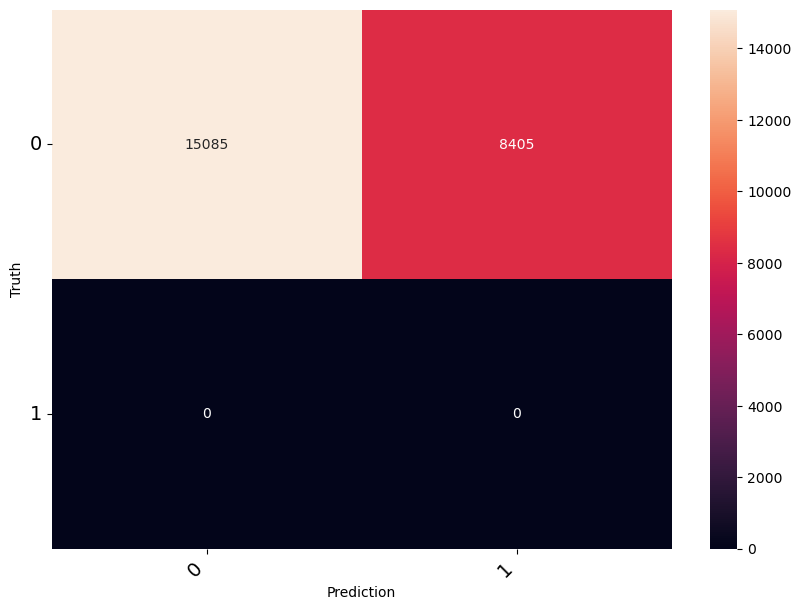

In [97]:
cm = confusion_matrix(y_test,y_pred_gb1)
print_confusion_matrix(cm,["0","1"])

In [99]:
y_pred_gb1

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [100]:
sample['is_promoted']=y_pred_gb1

In [101]:
sample.head()

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [102]:
sample.to_csv('sample.csv', index=False)